<a href="https://colab.research.google.com/github/raafet-hamdi/deeplearning/blob/master/ProjetRaafetMouhib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%tensorflow_version 1.x

from google.colab import drive
drive.mount('/content/dataset')

TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/dataset


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import shutil

import os
print(os.listdir("/content/dataset/My Drive/Colab Notebooks/cell_images/cell_images/"))

['Parasitized', 'Uninfected']


In [0]:
base_dir='/content/dataset/My Drive/Colab Notebooks/cell_images/cell_images/'
work_dir=  "work/"
os.mkdir(work_dir)

In [0]:
#Set A as parasitized or pos, B as uninfected or neg

base_dir_A ='/content/dataset/My Drive/Colab Notebooks/cell_images/cell_images/Parasitized/'
base_dir_B ='/content/dataset/My Drive/Colab Notebooks/cell_images/cell_images/Uninfected/'

work_dir_A = "work/A/"
os.mkdir(work_dir_A)
work_dir_B = "work/B/"
os.mkdir(work_dir_B)

In [6]:
#Make a train, valid, and test directory 
#Folders can only be generated ONCE before deletion needed
train_dir = os.path.join(work_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(work_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(work_dir, 'test')
os.mkdir(test_dir)

print("New directories for train, validation, and test made")

New directories for train, validation, and test made


In [7]:
#Within each directory, separate into pos (parasite), and neg (uninfect)
train_pos_dir = os.path.join(train_dir, 'pos')
os.mkdir(train_pos_dir)
train_neg_dir = os.path.join(train_dir, 'neg')
os.mkdir(train_neg_dir)

validation_pos_dir = os.path.join(validation_dir, 'pos')
os.mkdir(validation_pos_dir)
validation_neg_dir = os.path.join(validation_dir, 'neg')
os.mkdir(validation_neg_dir)

test_pos_dir = os.path.join(test_dir, 'pos')
os.mkdir(test_pos_dir)
test_neg_dir = os.path.join(test_dir, 'neg')
os.mkdir(test_neg_dir)

print("Train, Validation, and Test folders made for both A and B datasets")

Train, Validation, and Test folders made for both A and B datasets


In [8]:
#Rename all image pictures in folders A & B into pos and neg, respectively
i = 0
      
for filename in os.listdir(base_dir_A): 
       dst ="pos" + str(i) + ".jpg"
       src =base_dir_A + filename 
       dst =work_dir_A + dst 
          
       # rename() function will 
       # rename all the files 
       shutil.copy(src, dst) 
       i += 1


       
j = 0
      
for filename in os.listdir(base_dir_B): 
       dst ="neg" + str(j) + ".jpg"
       src =base_dir_B + filename 
       dst =work_dir_B + dst 
          
       # rename() function will 
       # rename all the files 
       shutil.copy(src, dst) 
       j += 1       
        
print("Images for both categories have been copied to working directories, renamed to A & B + num")

Images for both categories have been copied to working directories, renamed to A & B + num


In [9]:
#Now begin splitting images of each class into each of the three directories
       #For initial test purposes, only move 2000 images
fnames = ['pos{}.jpg'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(work_dir_A, fname)
    dst = os.path.join(train_pos_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['pos{}.jpg'.format(i) for i in range(90, 130)]
for fname in fnames:
    src = os.path.join(work_dir_A, fname)
    dst = os.path.join(validation_pos_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['pos{}.jpg'.format(i) for i in range(130, 162)]
for fname in fnames:
    src = os.path.join(work_dir_A, fname)
    dst = os.path.join(test_pos_dir, fname)
    shutil.copyfile(src, dst)
    
#Repeat for neg

fnames = ['neg{}.jpg'.format(i) for i in range(280)]
for fname in fnames:
    src = os.path.join(work_dir_B, fname)
    dst = os.path.join(train_neg_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['neg{}.jpg'.format(i) for i in range(280, 350)]
for fname in fnames:
    src = os.path.join(work_dir_B, fname)
    dst = os.path.join(validation_neg_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['neg{}.jpg'.format(i) for i in range(350, 402)]
for fname in fnames:
    src = os.path.join(work_dir_B, fname)
    dst = os.path.join(test_neg_dir, fname)
    shutil.copyfile(src, dst)
    
print("Train, validation, and test datasets split and ready for use")

Train, validation, and test datasets split and ready for use


In [10]:
#Sanity check 

print('total training pos images:', len(os.listdir(train_pos_dir)))
print('total training neg images:', len(os.listdir(train_neg_dir)))
print('total validation pos images:', len(os.listdir(validation_pos_dir)))
print('total validation neg images:', len(os.listdir(validation_neg_dir)))
print('total test pos images:', len(os.listdir(test_pos_dir)))
print('total test meg images:', len(os.listdir(test_neg_dir)))


total training pos images: 90
total training neg images: 280
total validation pos images: 40
total validation neg images: 70
total test pos images: 32
total test meg images: 52


In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

print("Image preprocessing complete")

Found 370 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Image preprocessing complete


In [13]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])

print("Model ready for use")






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         


In [14]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=200)
model.save('basic_malaria_pos_neg_v1.h5')




Epoch 1/30





100/100 [==============================] - 23s 232ms/step - loss: 0.5743 - acc: 0.7555 - val_loss: 0.6811 - val_acc: 0.6371
Epoch 2/30
100/100 [==============================] - 10s 97ms/step - loss: 0.5492 - acc: 0.7580 - val_loss: 0.6954 - val_acc: 0.6349
Epoch 3/30
100/100 [==============================] - 10s 97ms/step - loss: 0.5502 - acc: 0.7530 - val_loss: 0.6903 - val_acc: 0.6372
Epoch 4/30
100/100 [==============================] - 10s 97ms/step - loss: 0.5445 - acc: 0.7515 - val_loss: 0.6838 - val_acc: 0.6371
Epoch 5/30
100/100 [==============================] - 10s 97ms/step - loss: 0.5337 - acc: 0.7555 - val_loss: 0.6927 - val_acc: 0.6349
Epoch 6/30
100/100 [==============================] - 10s 97ms/step - loss: 0.5164 - acc: 0.7625 - val_loss: 0.7126 - val_acc: 0.6372
Epoch 7/30
100/100 [==============================] - 10s 96ms/step - loss: 0.5124 - acc: 0.7615 - val_loss: 0.7275 - val_acc: 0.6360
Epoch 8/30
100/100 [==============================] -

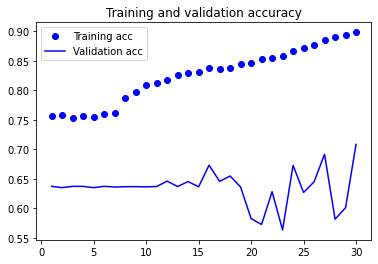

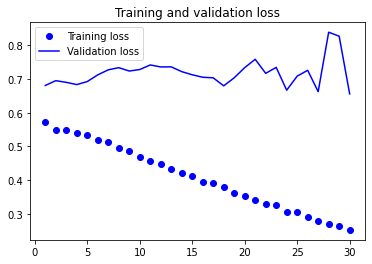

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_generator = eval_datagen.flow_from_directory(
        test_dir,target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
eval_generator.reset()    
pred = model.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")

Found 84 images belonging to 2 classes.
1000/1000 [==============================] - 24s 24ms/step
Predictions finished


In [17]:
#View confusion matrix
import numpy 
y_pred = numpy.rint(pred)
y_true = eval_generator.classes
print (confusion_matrix(y_true, y_pred))

NameError: ignored

In [18]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'

neg/neg350.jpg


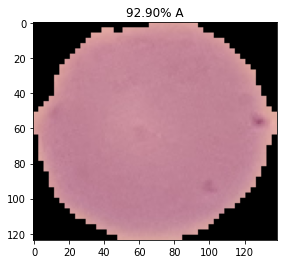

neg/neg351.jpg


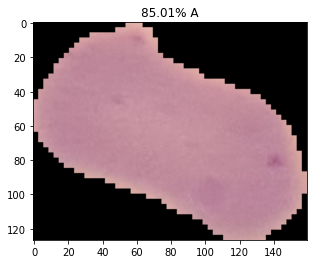

neg/neg352.jpg


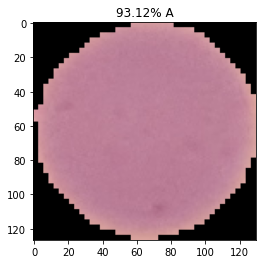

neg/neg353.jpg


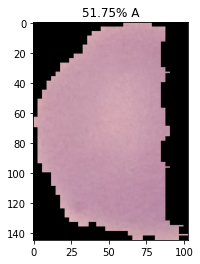

neg/neg354.jpg


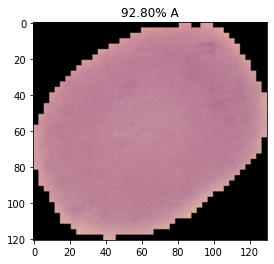

neg/neg355.jpg


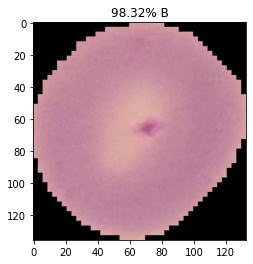

neg/neg356.jpg


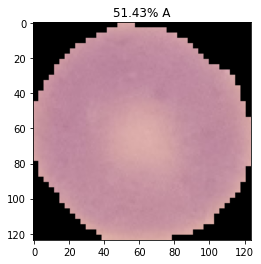

neg/neg357.jpg


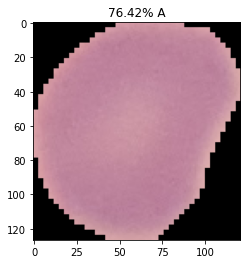

neg/neg358.jpg


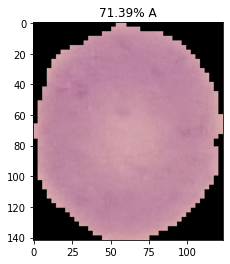

neg/neg359.jpg


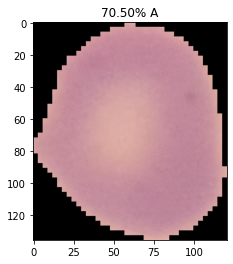

neg/neg360.jpg


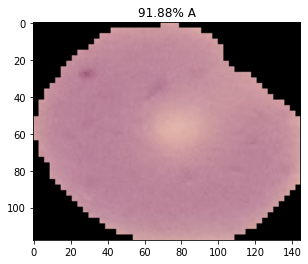

neg/neg361.jpg


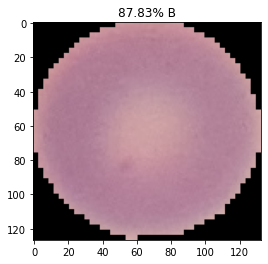

neg/neg362.jpg


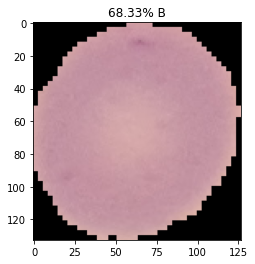

neg/neg363.jpg


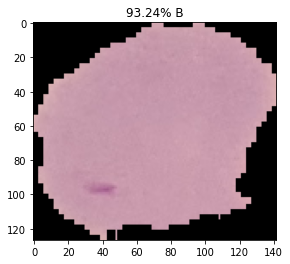

neg/neg364.jpg


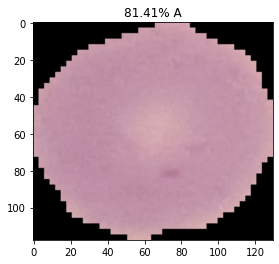

neg/neg365.jpg


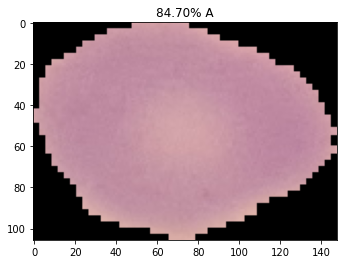

neg/neg366.jpg


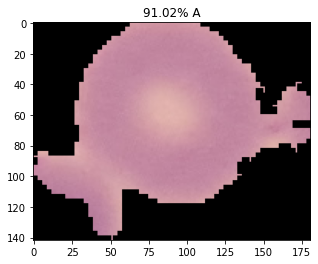

neg/neg367.jpg


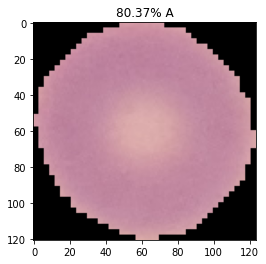

neg/neg368.jpg


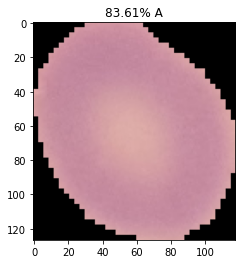

neg/neg369.jpg


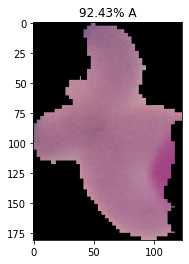

neg/neg370.jpg


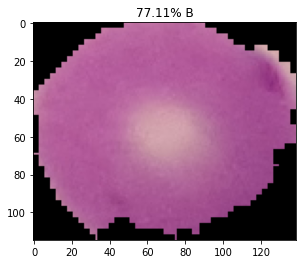

neg/neg371.jpg


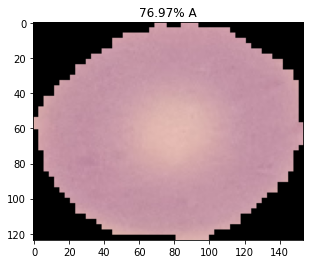

neg/neg372.jpg


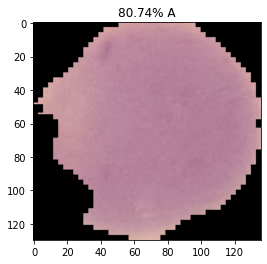

neg/neg373.jpg


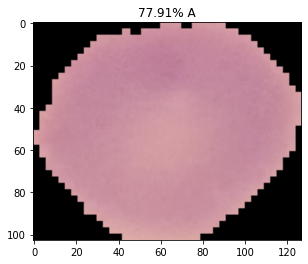

neg/neg374.jpg


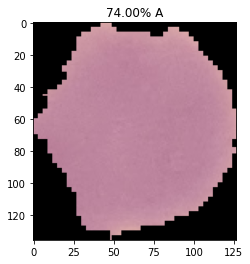

neg/neg375.jpg


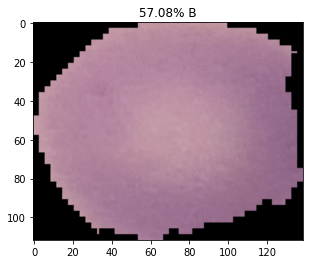

neg/neg376.jpg


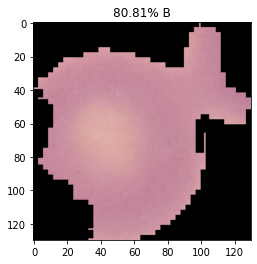

neg/neg377.jpg


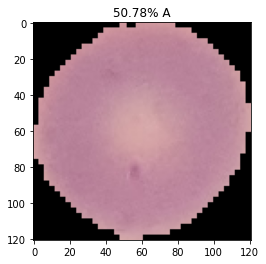

neg/neg378.jpg


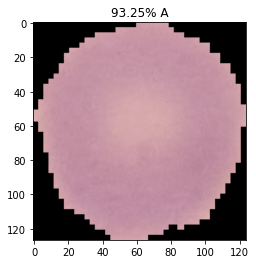

neg/neg379.jpg


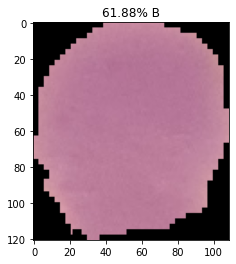

neg/neg380.jpg


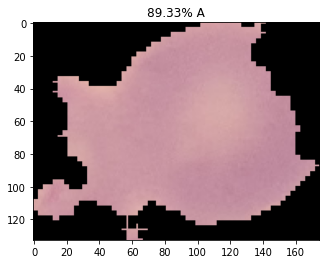

neg/neg381.jpg


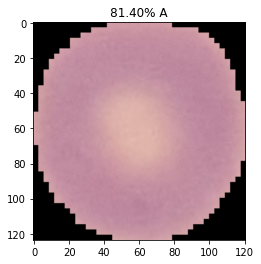

neg/neg382.jpg


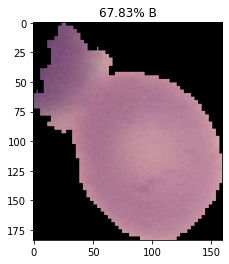

neg/neg383.jpg


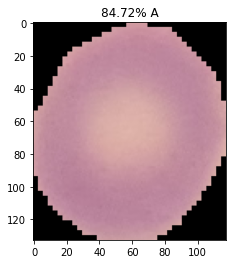

neg/neg384.jpg


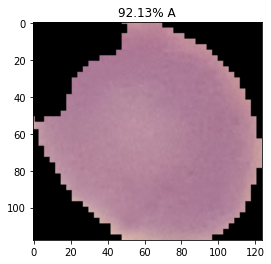

neg/neg385.jpg


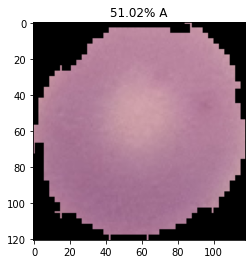

neg/neg386.jpg


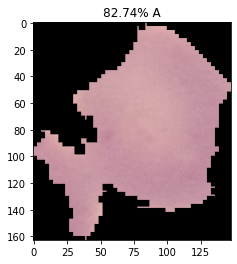

neg/neg387.jpg


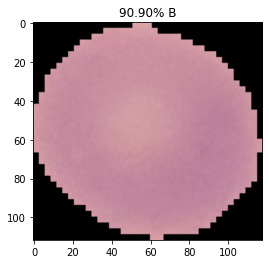

neg/neg388.jpg


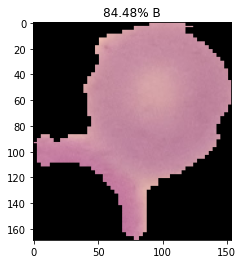

neg/neg389.jpg


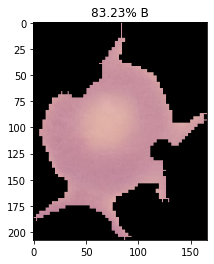

neg/neg390.jpg


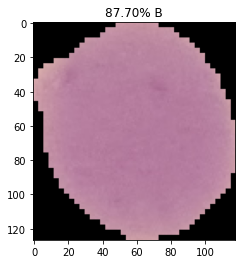

neg/neg391.jpg


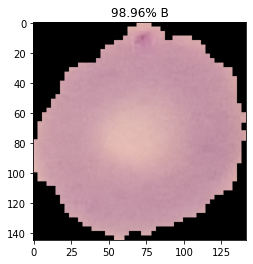

neg/neg392.jpg


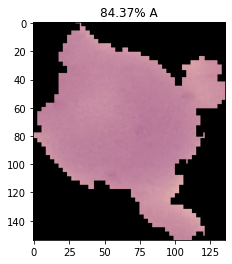

neg/neg393.jpg


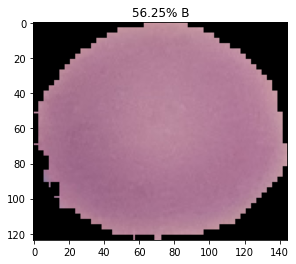

neg/neg394.jpg


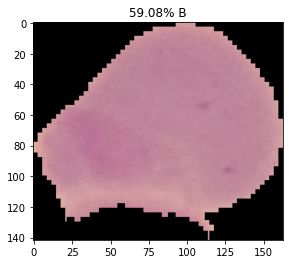

neg/neg395.jpg


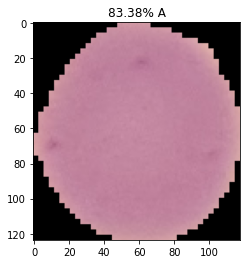

neg/neg396.jpg


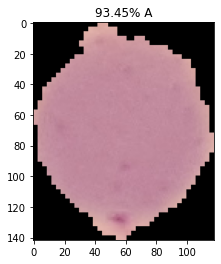

neg/neg397.jpg


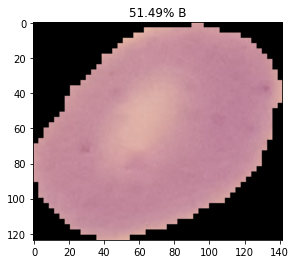

neg/neg398.jpg


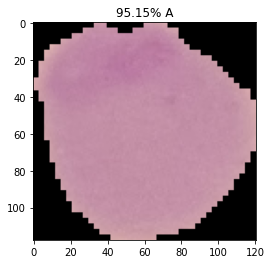

neg/neg399.jpg


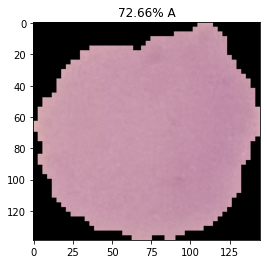

neg/neg400.jpg


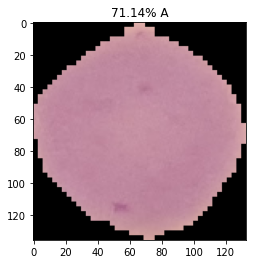

neg/neg401.jpg


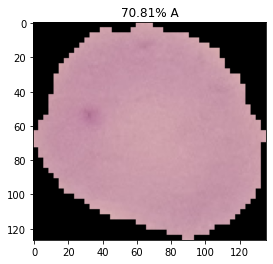

pos/pos130.jpg


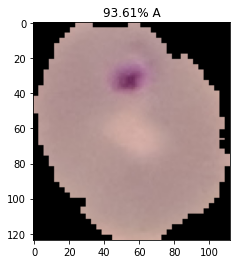

pos/pos131.jpg


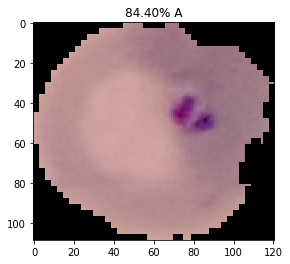

pos/pos132.jpg


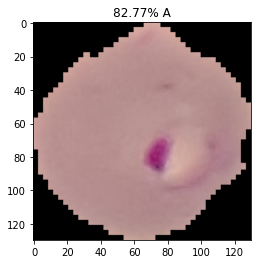

pos/pos133.jpg


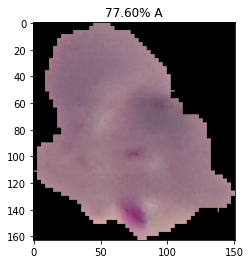

pos/pos134.jpg


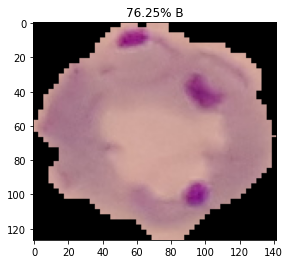

pos/pos135.jpg


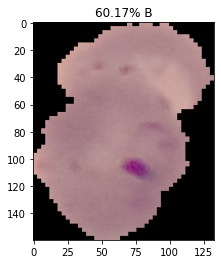

pos/pos136.jpg


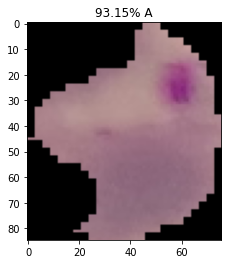

pos/pos137.jpg


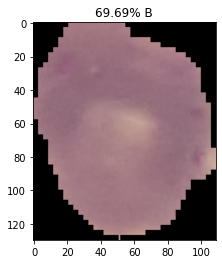

pos/pos138.jpg


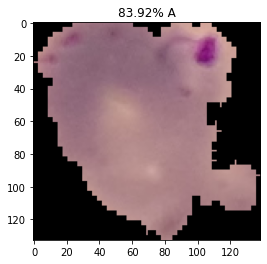

pos/pos139.jpg


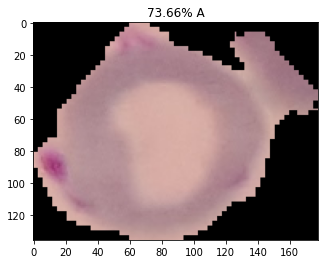

pos/pos140.jpg


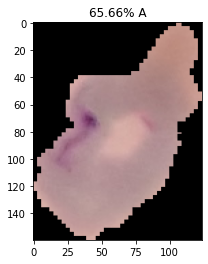

pos/pos141.jpg


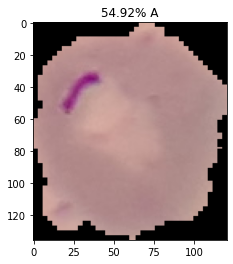

pos/pos142.jpg


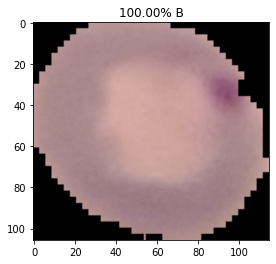

pos/pos143.jpg


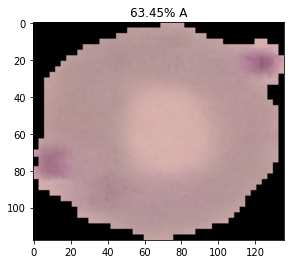

pos/pos144.jpg


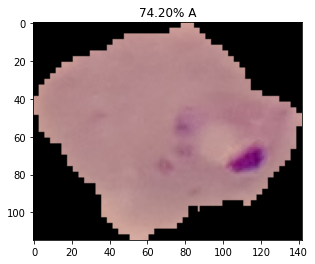

pos/pos145.jpg


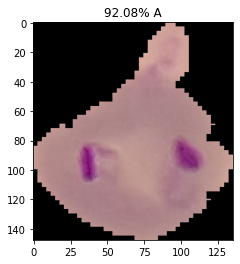

pos/pos146.jpg


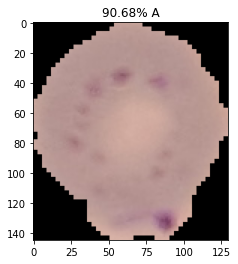

pos/pos147.jpg


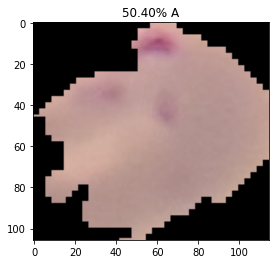

pos/pos148.jpg


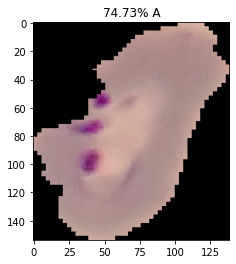

pos/pos149.jpg


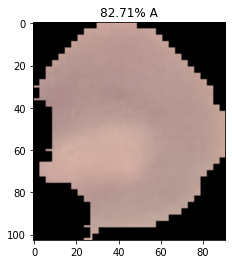

pos/pos150.jpg


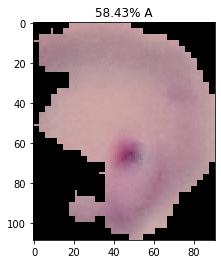

pos/pos151.jpg


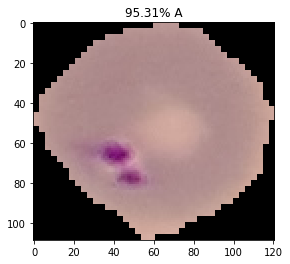

pos/pos152.jpg


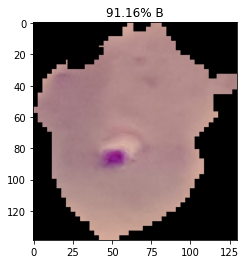

pos/pos153.jpg


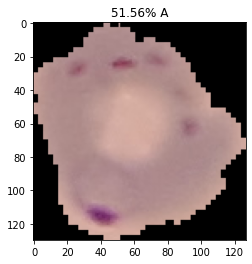

pos/pos154.jpg


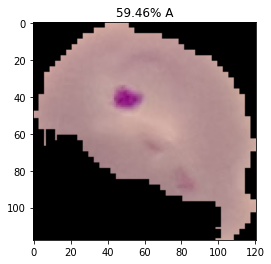

pos/pos155.jpg


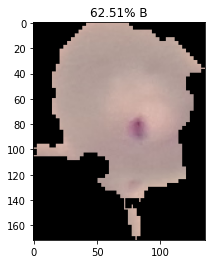

pos/pos156.jpg


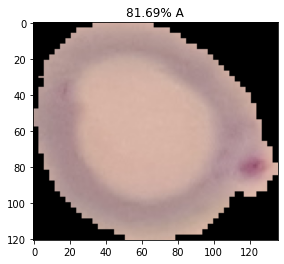

pos/pos157.jpg


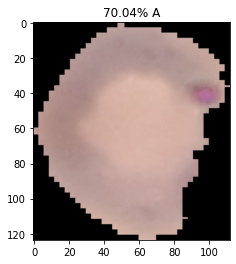

pos/pos158.jpg


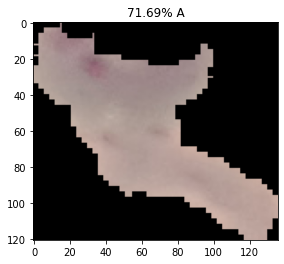

pos/pos159.jpg


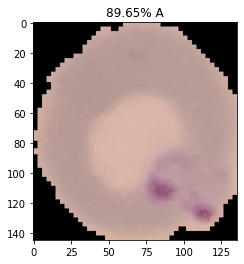

pos/pos160.jpg


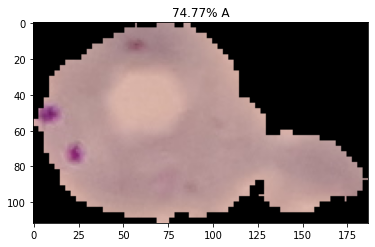

pos/pos161.jpg


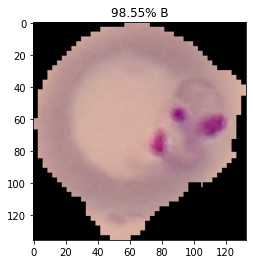

IndexError: ignored

In [19]:
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    image_path = test_dir + "/" +eval_generator.filenames[index]
    img = mpimg.imread(image_path)
    
    plt.imshow(img)
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% B")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% A")
    plt.show()